In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
### Data generate

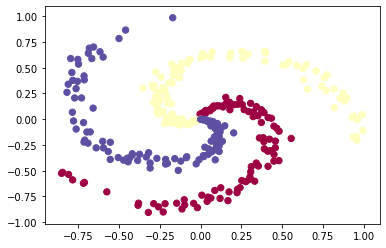

(300, 2)
(300,)


In [2]:
N = 100 # number of points per class
D = 2 # dimensionality
K = 3 # number of classes
inputs = np.zeros((N*K,D)) # data matrix (each row = single example)
targets = np.zeros(N*K, dtype='uint8') # class labels
for j in range(K):
    ix = range(N*j,N*(j+1))
    r = np.linspace(0.0,1,N) # radius
    t = np.linspace(j*4,(j+1)*4,N) + np.random.randn(N)*0.2 # theta
    inputs[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
    targets[ix] = j

# # lets visualize the data:
plt.scatter(inputs[:, 0], inputs[:, 1], c=targets, s=40, cmap=plt.cm.Spectral)
plt.show()


print (inputs.shape)
print (targets.shape)

### Shuffling dataset

In [3]:
shuffle_indices = np.arange(len(inputs))
np.random.shuffle(shuffle_indices)

inputs = inputs[shuffle_indices]
targets = targets[shuffle_indices]

### Split the dataset

In [4]:
training_rate = .8

sample_count = len(inputs)
train_sample_count = int(training_rate * sample_count)

train_inputs  = inputs[0:train_sample_count]
train_targets = targets[0:train_sample_count]

test_inputs  = inputs[train_sample_count::]
test_targets = targets[train_sample_count::]

print(train_inputs.shape)
print(train_targets.shape)
print(test_inputs.shape)
print(test_targets.shape)

(240, 2)
(240,)
(60, 2)
(60,)


# Model

### Architecture :

In [8]:
inputs_unit = 2
hidden_units = 10
outputs_units = 3

W1 = np.random.uniform(-1, 1, size=(inputs_unit ,hidden_units))
W2 = np.random.uniform(-1, 1, size=(hidden_units ,outputs_units))

b1 = np.random.uniform(-1, 1, size=(1, hidden_units))
b2 = np.random.uniform(-1, 1, size=(1, outputs_units))

### Train Model :

In [11]:
X = train_inputs
y = train_targets

num_examples = train_inputs.shape[0]

learning_rate = 1e-0
for epoch in range(10000):
    hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
    scores = np.dot(hidden_layer, W2) + b2

    normalize_scores = scores - scores.max()
    exp_scores = np.exp(normalize_scores)
    y_hat = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)
    
    loss = -np.sum(np.log(y_hat[range(num_examples),y])) / num_examples
    
    d_loss = y_hat.copy()    
    d_loss[range(num_examples), y] -= 1
    d_loss /= num_examples
    
    dW2 = np.dot(hidden_layer.T, d_loss)
    db2 = np.sum(d_loss, axis=0, keepdims=True)

    dhidden = np.dot(d_loss, W2.T)
    dhidden[hidden_layer <= 0] = 0

    dW = np.dot(X.T, dhidden)
    db = np.sum(dhidden, axis=0, keepdims=True)
    

    W1 += -learning_rate * dW
    b1 += -learning_rate * db
    W2 += -learning_rate * dW2
    b2 += -learning_rate * db2
    
    accuracy = (y == np.argmax(y_hat, axis=1)).mean()
    
    if epoch % 500 ==0:
        print('Epoch [{}], Loss: {:.4f}, Accuracy: {:.1f}%'.format(epoch, loss, 100*accuracy))

Epoch [0], Loss: 0.0619, Accuracy: 97.9%
Epoch [500], Loss: 0.0588, Accuracy: 97.9%
Epoch [1000], Loss: 0.0567, Accuracy: 97.9%
Epoch [1500], Loss: 0.0550, Accuracy: 98.3%
Epoch [2000], Loss: 0.0537, Accuracy: 98.3%
Epoch [2500], Loss: 0.0519, Accuracy: 98.3%
Epoch [3000], Loss: 0.0506, Accuracy: 98.3%
Epoch [3500], Loss: 0.0501, Accuracy: 98.8%
Epoch [4000], Loss: 0.0489, Accuracy: 98.8%
Epoch [4500], Loss: 0.0482, Accuracy: 98.8%
Epoch [5000], Loss: 0.0471, Accuracy: 98.8%
Epoch [5500], Loss: 0.0465, Accuracy: 98.8%
Epoch [6000], Loss: 0.0456, Accuracy: 98.8%
Epoch [6500], Loss: 0.0444, Accuracy: 98.8%
Epoch [7000], Loss: 0.0436, Accuracy: 98.8%
Epoch [7500], Loss: 0.0431, Accuracy: 98.8%
Epoch [8000], Loss: 0.0420, Accuracy: 98.8%
Epoch [8500], Loss: 0.0415, Accuracy: 98.8%
Epoch [9000], Loss: 0.0411, Accuracy: 98.8%
Epoch [9500], Loss: 0.0407, Accuracy: 98.8%


### Test Model :

In [15]:
X = test_inputs
y = test_targets

num_examples = len(y)

hidden_layer = np.maximum(0, np.dot(X, W1) + b1)
scores = np.dot(hidden_layer, W2) + b2

normalize_scores = scores - scores.max()
exp_scores = np.exp(normalize_scores)
y_hat = exp_scores / np.sum(exp_scores, axis=1, keepdims=True)

loss = -np.sum(np.log(y_hat[range(num_examples),y])) / num_examples
accuracy = (y == np.argmax(y_hat, axis=1)).mean()

print('Loss: {:.4f}, Accuracy: {:.1f}%'.format(loss, 100*accuracy))

Loss: 2.0210, Accuracy: 95.0%
